In [110]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegressionCV


In [ ]:
load_dataset =  pd.read_csv('./loan_data_set.csv')

In [ ]:
load_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
load_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# statistics summary 
load_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [ ]:
# identify if my dataset has missing values 
# load_dataset.isnull().sum()
load_dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# check % of missing values 
(load_dataset.isna().sum() / len(load_dataset)) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
# check gender column distribution
load_dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
# As male are more than female, male applicants are four times of female, fill missing values to male. Remember that the total missing vvalues are 2%

load_dataset['Gender'] = load_dataset['Gender'].fillna('Male') 

In [ ]:
load_dataset['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
# as well i will fill yes, as it is higher than No
load_dataset['Married'] = load_dataset['Married'].fillna('Yes')

In [ ]:
load_dataset['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# as well i will fill 0, as it is higher than other columns
load_dataset['Dependents'] = load_dataset['Dependents'].fillna('0')

In [ ]:
load_dataset['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
# as well i will fill No, as it is higher
load_dataset['Self_Employed'] = load_dataset['Self_Employed'].fillna('No')

In [ ]:
load_dataset['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
# i have used the mean to fill missing values
load_dataset['LoanAmount'] = load_dataset['LoanAmount'].fillna(load_dataset['LoanAmount'].mean())

In [ ]:
load_dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# i use 360.0 missing values as month 
load_dataset['Loan_Amount_Term'] = load_dataset['Loan_Amount_Term'].fillna(360.0)

In [ ]:
load_dataset['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
# here iw ill fill 1 as it is the one which has higher values compared to 0.0

load_dataset['Credit_History'] = load_dataset['Credit_History'].fillna(360.0)

In [ ]:
load_dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Data Preprocessing - reason to drop Loan_ID is not correlated to the loan status and Loan_status will be used on Y feature
X =  load_dataset.drop(['Loan_ID', 'Loan_Status'], axis = 1)
X = pd.get_dummies(X, drop_first = True)

In [ ]:
y = load_dataset['Loan_Status']

In [ ]:
# splitting the dataset into the training set 80% and testing set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 101)


In [ ]:
# Feature scaling 
scale_data = StandardScaler()
X_train = scale_data.fit_transform(X_train)
X_test = scale_data.transform(X_test)

In [ ]:
# Fitting logistic regression to the training set 
logist_regr_model =  LogisticRegression()
logist_regr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluation model performance 
y_pred = logist_regr_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6178861788617886

In [95]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 1, 44],
       [ 3, 75]], dtype=int64)

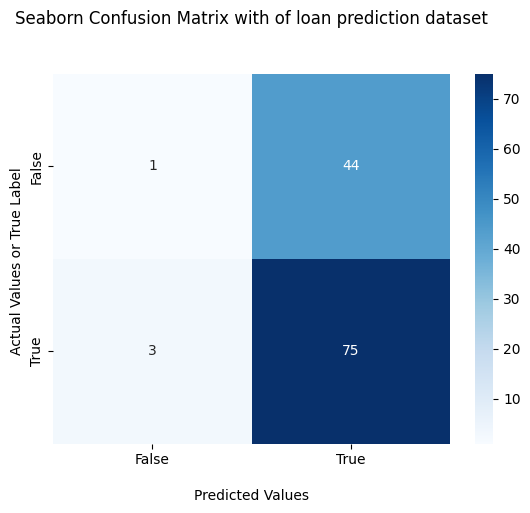

In [97]:


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with of loan prediction dataset\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values or True Label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [98]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.25      0.02      0.04        45
           Y       0.63      0.96      0.76        78

    accuracy                           0.62       123
   macro avg       0.44      0.49      0.40       123
weighted avg       0.49      0.62      0.50       123



In [100]:
# To improve model performance ,
# Create the logistic regression model and use cross valiation to find a well performing C values for hyper parameter 
# We have two option here, use LogisticRegressionCV or use a combination of logisticRegression and GridSearchCV
# I use the simpler LogisticRegressionCV approach 

log_model_cv = LogisticRegressionCV()
log_model_cv.fit(X_train, y_train)

LogisticRegressionCV()

In [101]:
log_model_cv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [102]:
log_model_cv.coef_ # coefficiency of each features , indicates the direction of the relationship between a predictor variable and the response variable

array([[ 0.00244866, -0.14183737, -0.08361378, -0.04913243,  0.05132432,
        -0.00736222,  0.1089852 , -0.09976575,  0.08964054, -0.11554533,
        -0.2187693 ,  0.02247635,  0.26195461, -0.06314259]])

In [103]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


In [104]:
# Evaluate model performance 
y_pred = log_model_cv.predict(X_test)

In [105]:
accuracy_score(y_test, y_pred)

0.6260162601626016

In [106]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 0, 45],
       [ 1, 77]], dtype=int64)

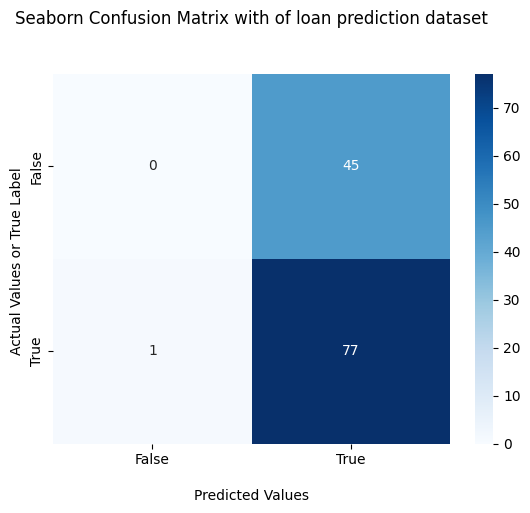

In [107]:


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with of loan prediction dataset\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values or True Label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        45
           Y       0.63      0.99      0.77        78

    accuracy                           0.63       123
   macro avg       0.32      0.49      0.39       123
weighted avg       0.40      0.63      0.49       123



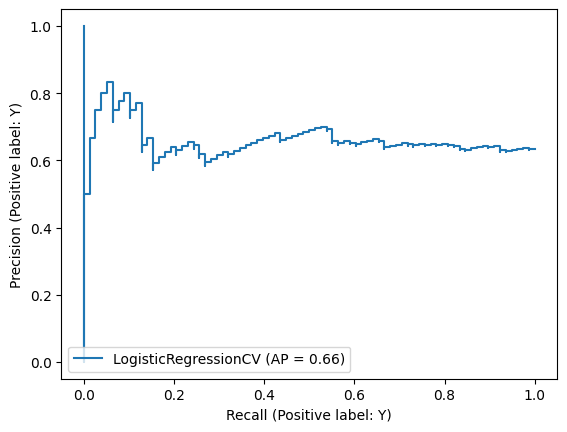

In [112]:
# Evaluating curve and AUC
PrecisionRecallDisplay.from_estimator(log_model_cv, X_test, y_test)

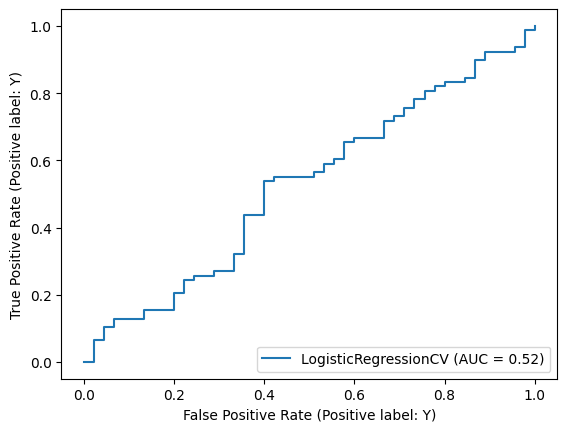

In [113]:
RocCurveDisplay.from_estimator(log_model_cv, X_test, y_test)